# Not A Bug Conf - Image recognition with keras and tensorflow


First of all import all you need to run code.

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras import backend as K
import os
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Set some variables that will be used to set up and train out model.

1. __train_data_dir__ ------------> the directory containing the dataset we whant to use for train the model
2. __validation_data_dir__ -------> the directory containing the dataset we whant to use for evaluating the model
3. __img_width, img_height__ -----> the dimension in pixel of the images we want to feed in the model
4. __nb_train_samples__ ----------> number of samples we want to use in training
5. __nb_validation_samples__ -----> number of samples we want to use for evaluating the model
6. __epochs__ --------------------> number of epochs for the training
7. __batch_size__ ----------------> number of samples we want to batch for single train step (weights adjustment)

In [2]:
train_data_dir = os.path.join('simpsons_dataset', 'simpsons_trainset')
validation_data_dir = os.path.join('simpsons_dataset', 'simpson_testset')

img_width, img_height = 64, 64
nb_train_samples = 30000
nb_validation_samples = 990
epochs = 10
batch_size = 32

## Define the model

First we set the input shape depending on or backend __image_data_format__.

Initialize model with __Sequential()__ allows you to easily stack sequential layers of the network in order from input to output.



In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()

Next, we add a 2D convolutional layer to process input images.
We need to pass some arguments to the Conv2D() layer function:

1. The first argument is the number of outputs channels (as we have described in the model architecture).
2. Then we need to pass the kernel_size (as we have seen a 5x5 moving window) and the strides in x and y directions (1, 1).
3. We set the activation function as a rectified linear unit, and declare the input shape we defined before. (Input shape is only needed in the first layer)

In [4]:
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))

Next, we add a 2D max pooling layer.

In the __MaxPooling2D()__ function we need to define the size of the pooling (2, 2) and the strides in x and y directions (2, 2).

In [5]:
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

Then we add an additional conv+MaxPooling layer accordingly to our model architecture.

In [6]:
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

We have just finished building our convolutional layers, now we want to connect the output of convolutional layers to fully connected layers. 

First of all we need to flatten the output  with __Flatten()__ function.
Next we add two __Dense()__ (fully connected) layers declaring output and activation function.
Notice that the output of the final layer must match the number of category we whant to distinguish.
In our case 4 simpsons characters (bart, homer, lisa, marge).

In [7]:
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(4, activation='softmax'))

Last step of our model definition is the __model.compile()__
here we need to pass some arguments:
1. the loss function we want to minimize (keras provides a lot of loss functions - see [here](https://keras.io/losses/))
2. an optimizer function to optimize our learning process (keras provides also a lot of loss functions - see [here](https://keras.io/optimizers/))
3. a metric for the model evaluation. (as before keras provides a lot of loss functions - see [here](https://keras.io/metrics/))

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Data augmentation for training

Keras provide us __ImageDataGenerator()__ class that let you generate always a fresh dataflow starting form a data directory to feed in our training-evaluating process.

The images taken from the train_data_dir are randomly manipulated and feeded in to the model.

This step is very important to provide a better training to the model.

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1. / 255.0)

## Pick data from dir

With the flow_from_directory() method we can flow the data gathering all the model need directly from the directory structure, resizing where needed.


In [10]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 6233 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


## Feed the model

With fit_generator() we start the training process. 
1. First of all we need to pass the training data as the first argument.
2. Then we declare the steps needed for each epoch, that will be obviously the number of training samples divided by the batch size.
3. Next the number of epochs we whant to train the model.
4. Then the validation data aka test datataset and the validation steps.

In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
937/937 [==============================] - 221s 236ms/step - loss: 0.8644 - acc: 0.6328 - val_loss: 0.5827 - val_acc: 0.7373
Epoch 2/10
937/937 [==============================] - 192s 204ms/step - loss: 0.4982 - acc: 0.8040 - val_loss: 0.3598 - val_acc: 0.8866
Epoch 3/10
937/937 [==============================] - 196s 209ms/step - loss: 0.3302 - acc: 0.8785 - val_loss: 0.2414 - val_acc: 0.8970
Epoch 4/10
937/937 [==============================] - 189s 201ms/step - loss: 0.2685 - acc: 0.9016 - val_loss: 0.1897 - val_acc: 0.9306
Epoch 5/10
937/937 [==============================] - 191s 204ms/step - loss: 0.2195 - acc: 0.9232 - val_loss: 0.1890 - val_acc: 0.9306
Epoch 6/10
937/937 [==============================] - 193s 206ms/step - loss: 0.1966 - acc: 0.9317 - val_loss: 0.1512 - val_acc: 0.9618
Epoch 7/10
937/937 [==============================] - 196s 209ms/step - loss: 0.1810 - acc: 0.9378 - val_loss: 0.1073 - val_acc: 0.9630
Epoch 8/10
937/937 [============================

## Plot some graph
Saving the model training process to a history variable is usefull to plot the metrics in a graph.
In neural network training the training graph are the most usefull tool to benchmark our model and to do optimization of the architecture if needed.

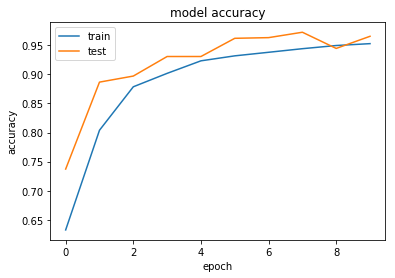

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save the model

After such a long wait for the learning process to come to an end dont forget to save the trained model.
There are two way to save the model.
1. Save the model weights (that are the result of traing) without model architecture. (this option is used mainly to switch the model to another framework
2. Save the entire model (architecture and weights), so that it can be simply loaded up from keras.


In [13]:
# Save weights for further use
model.save_weights('simpsons_weights.h5')
model.save('simpsons_model_trained')